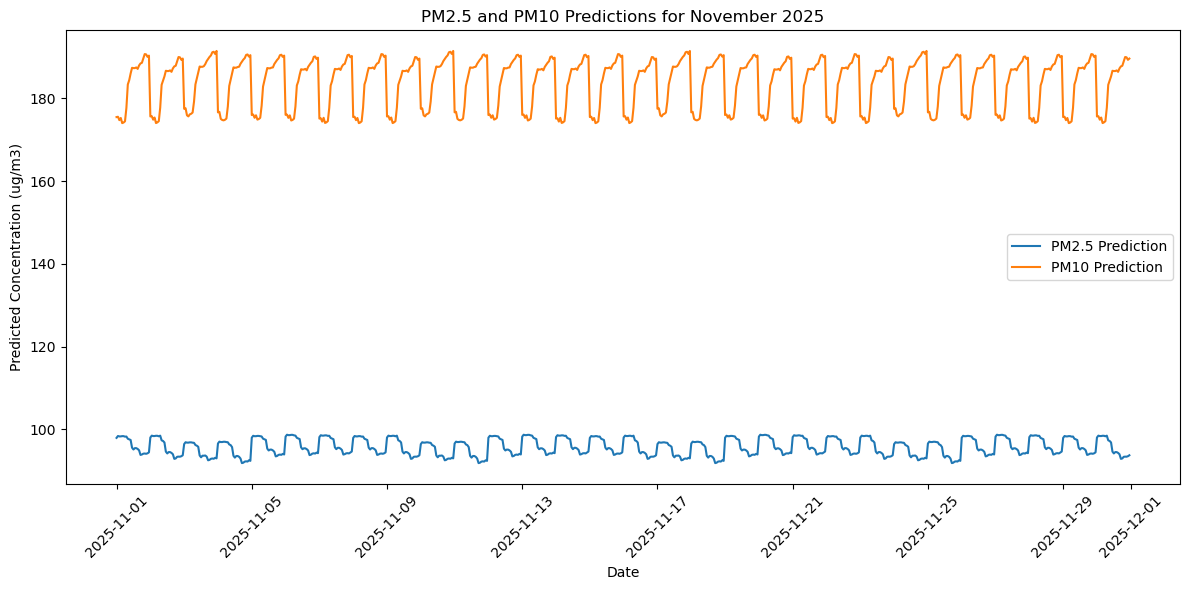

Predictions for November 2025 saved to november_2025_predictions.csv


In [3]:
# prediction.py (Run this SECOND)
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Load Preprocessed Data, Features, and Models 
try:
    df_imputed = joblib.load("PB003_preprocessed_df.joblib")
    features_pm25 = joblib.load("PB003_features_pm25.joblib")
    features_pm10 = joblib.load("PB003_features_pm10.joblib")
    model_pm25 = joblib.load("trained_model_pm25.joblib")
    model_pm10 = joblib.load("trained_model_pm10.joblib")
except FileNotFoundError:
    print("Error: One or more required files not found. Make sure you have run the training script first.")
    exit()

# 2. Create a Synthetic Dataset for November 2025
start_date = pd.to_datetime('2025-11-01')
end_date = pd.to_datetime('2025-11-30 23:00:00')  
next_month_dates = pd.date_range(start=start_date, end=end_date, freq='h')  

df_next_month = pd.DataFrame({'From Date': next_month_dates})
df_next_month['To Date'] = df_next_month['From Date'] + pd.Timedelta(hours=1)
df_next_month['Hour'] = df_next_month['From Date'].dt.hour
df_next_month['DayOfWeek'] = df_next_month['From Date'].dt.dayofweek
df_next_month['Month'] = df_next_month['From Date'].dt.month  # All will be 11



# 3. Populate Other Features (using November averages)
for feature in features_pm25: # First populate columns used to train for pm2.5 predictions
    if feature not in ['Hour', 'DayOfWeek', 'Month']:
        df_next_month[feature] = df_imputed[df_imputed['Month'] == 11][feature].mean()

# Then populate columns used to train for pm10 predictions if not already present
for feature in features_pm10: 
    if feature not in ['Hour', 'DayOfWeek', 'Month', *features_pm25]: # Ignore duplicates
        df_next_month[feature] = df_imputed[df_imputed['Month'] == 11][feature].mean()


# 4. Make Predictions (Use the *correct* feature sets)
df_next_month['PM2.5_Prediction'] = model_pm25.predict(df_next_month[features_pm25]) # Correct feature list for PM2.5
df_next_month['PM10_Prediction'] = model_pm10.predict(df_next_month[features_pm10])  # Correct feature list for PM10


# 5. Visualize Predictions
plt.figure(figsize=(12, 6))
plt.plot(df_next_month['From Date'], df_next_month['PM2.5_Prediction'], label='PM2.5 Prediction')
plt.plot(df_next_month['From Date'], df_next_month['PM10_Prediction'], label='PM10 Prediction')
plt.xlabel("Date")
plt.ylabel("Predicted Concentration (ug/m3)")
plt.title("PM2.5 and PM10 Predictions for November 2025")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


df_next_month.to_csv("november_2025_predictions.csv", index = False)
print("Predictions for November 2025 saved to november_2025_predictions.csv")